# Assignment 5

## 1. Load data and install relavent packages

In [41]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from sklearn.datasets import load_iris
import pandas as pd
import scipy.cluster.hierarchy as shc  
import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans

In [43]:
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
# Keep only Sepal Length and Sepal Width
df = df[['sepal length (cm)','sepal width (cm)']]
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## 2. Draw Dendrogram using Ward Method

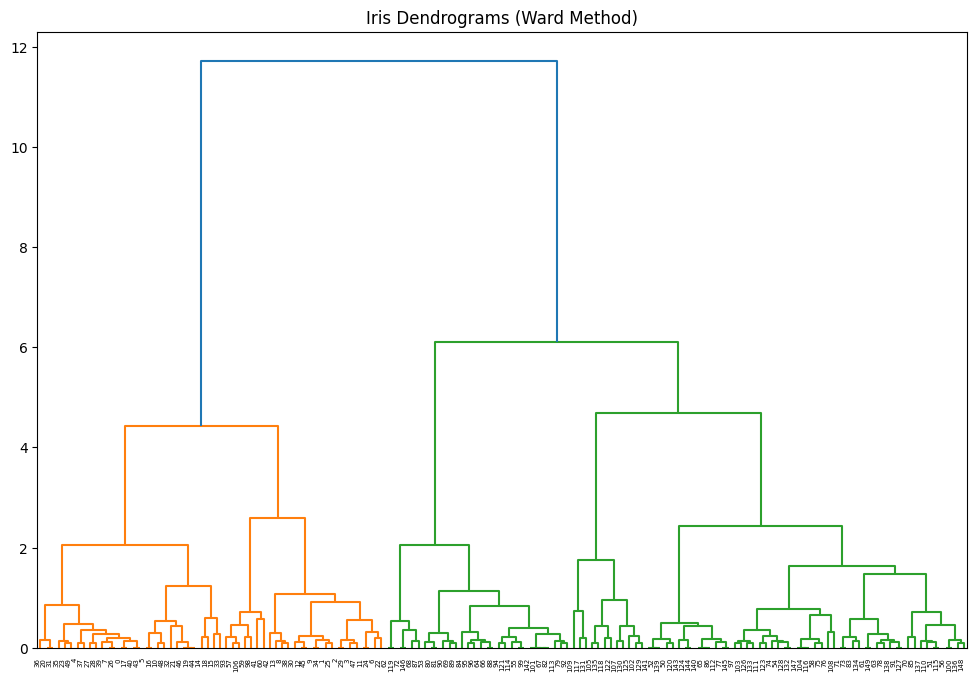

In [44]:
plt.figure(figsize=(12, 8))  
plt.title("Iris Dendrograms (Ward Method)")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))  
plt.xticks(rotation=90, fontsize=5, ha='right')  
plt.show()  

## Step 3: Using dentrogram to determine a few number of clusters (k)

In a dendrogram, the longest vertical distances represent the most significant merges, indicating where clusters are most distinct before being combined. Based on the dendrogram above, notable vertical gaps occur at:

Blue line: height 4-12
Green line: height 2-6
Orange line: height 2-4
Orange line: height 1-3

Drawing horizontal lines at these heights can help determine the optimal number of clusters, k.


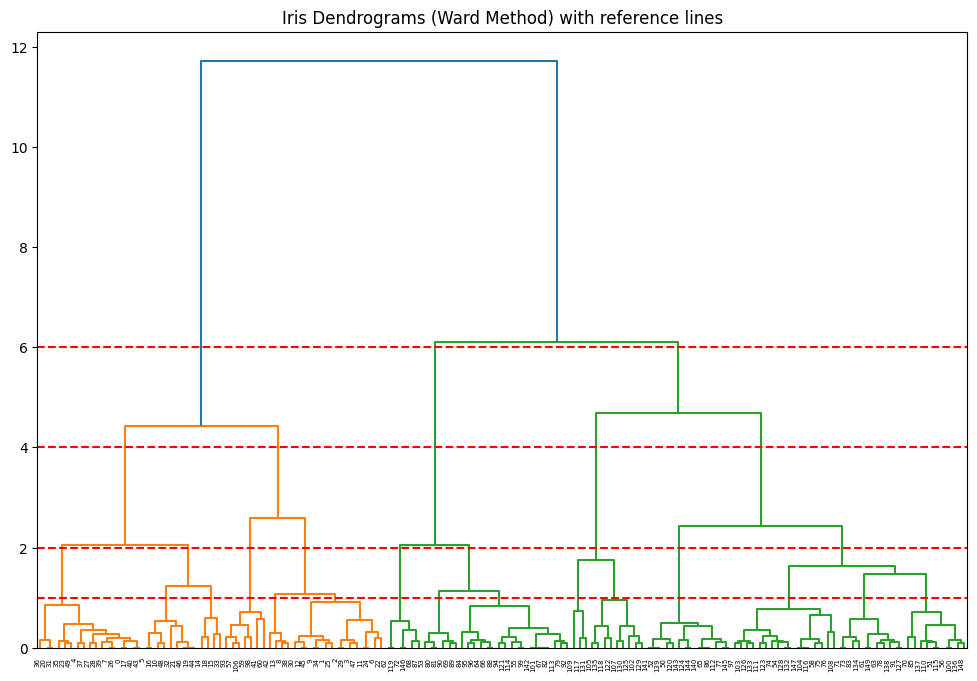

In [45]:
plt.figure(figsize=(12, 8))  
plt.title("Iris Dendrograms (Ward Method) with reference lines")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))  
plt.xticks(rotation=90, fontsize=5, ha='right')  

heights = [6, 4, 2, 1]  # Heights based on identified vertical gaps  
for height in heights:  
    plt.axhline(y=height, color='r', linestyle='--')  

plt.show()  

- Height 6: intersects 3 vertical lines, suggesting 3 clusters
- Height 4: intersects 5 vertical lines, suggesting 5 clusters
- Height 2: intersects 5 vertical lines, suggesting 9 clusters
- Height 1: intersects 5 vertical lines, suggesting 15 clusters

## 4. Stpe 4 - Show the clusters for the 4 k values chosen above for Ward and Comlete linkage side by side

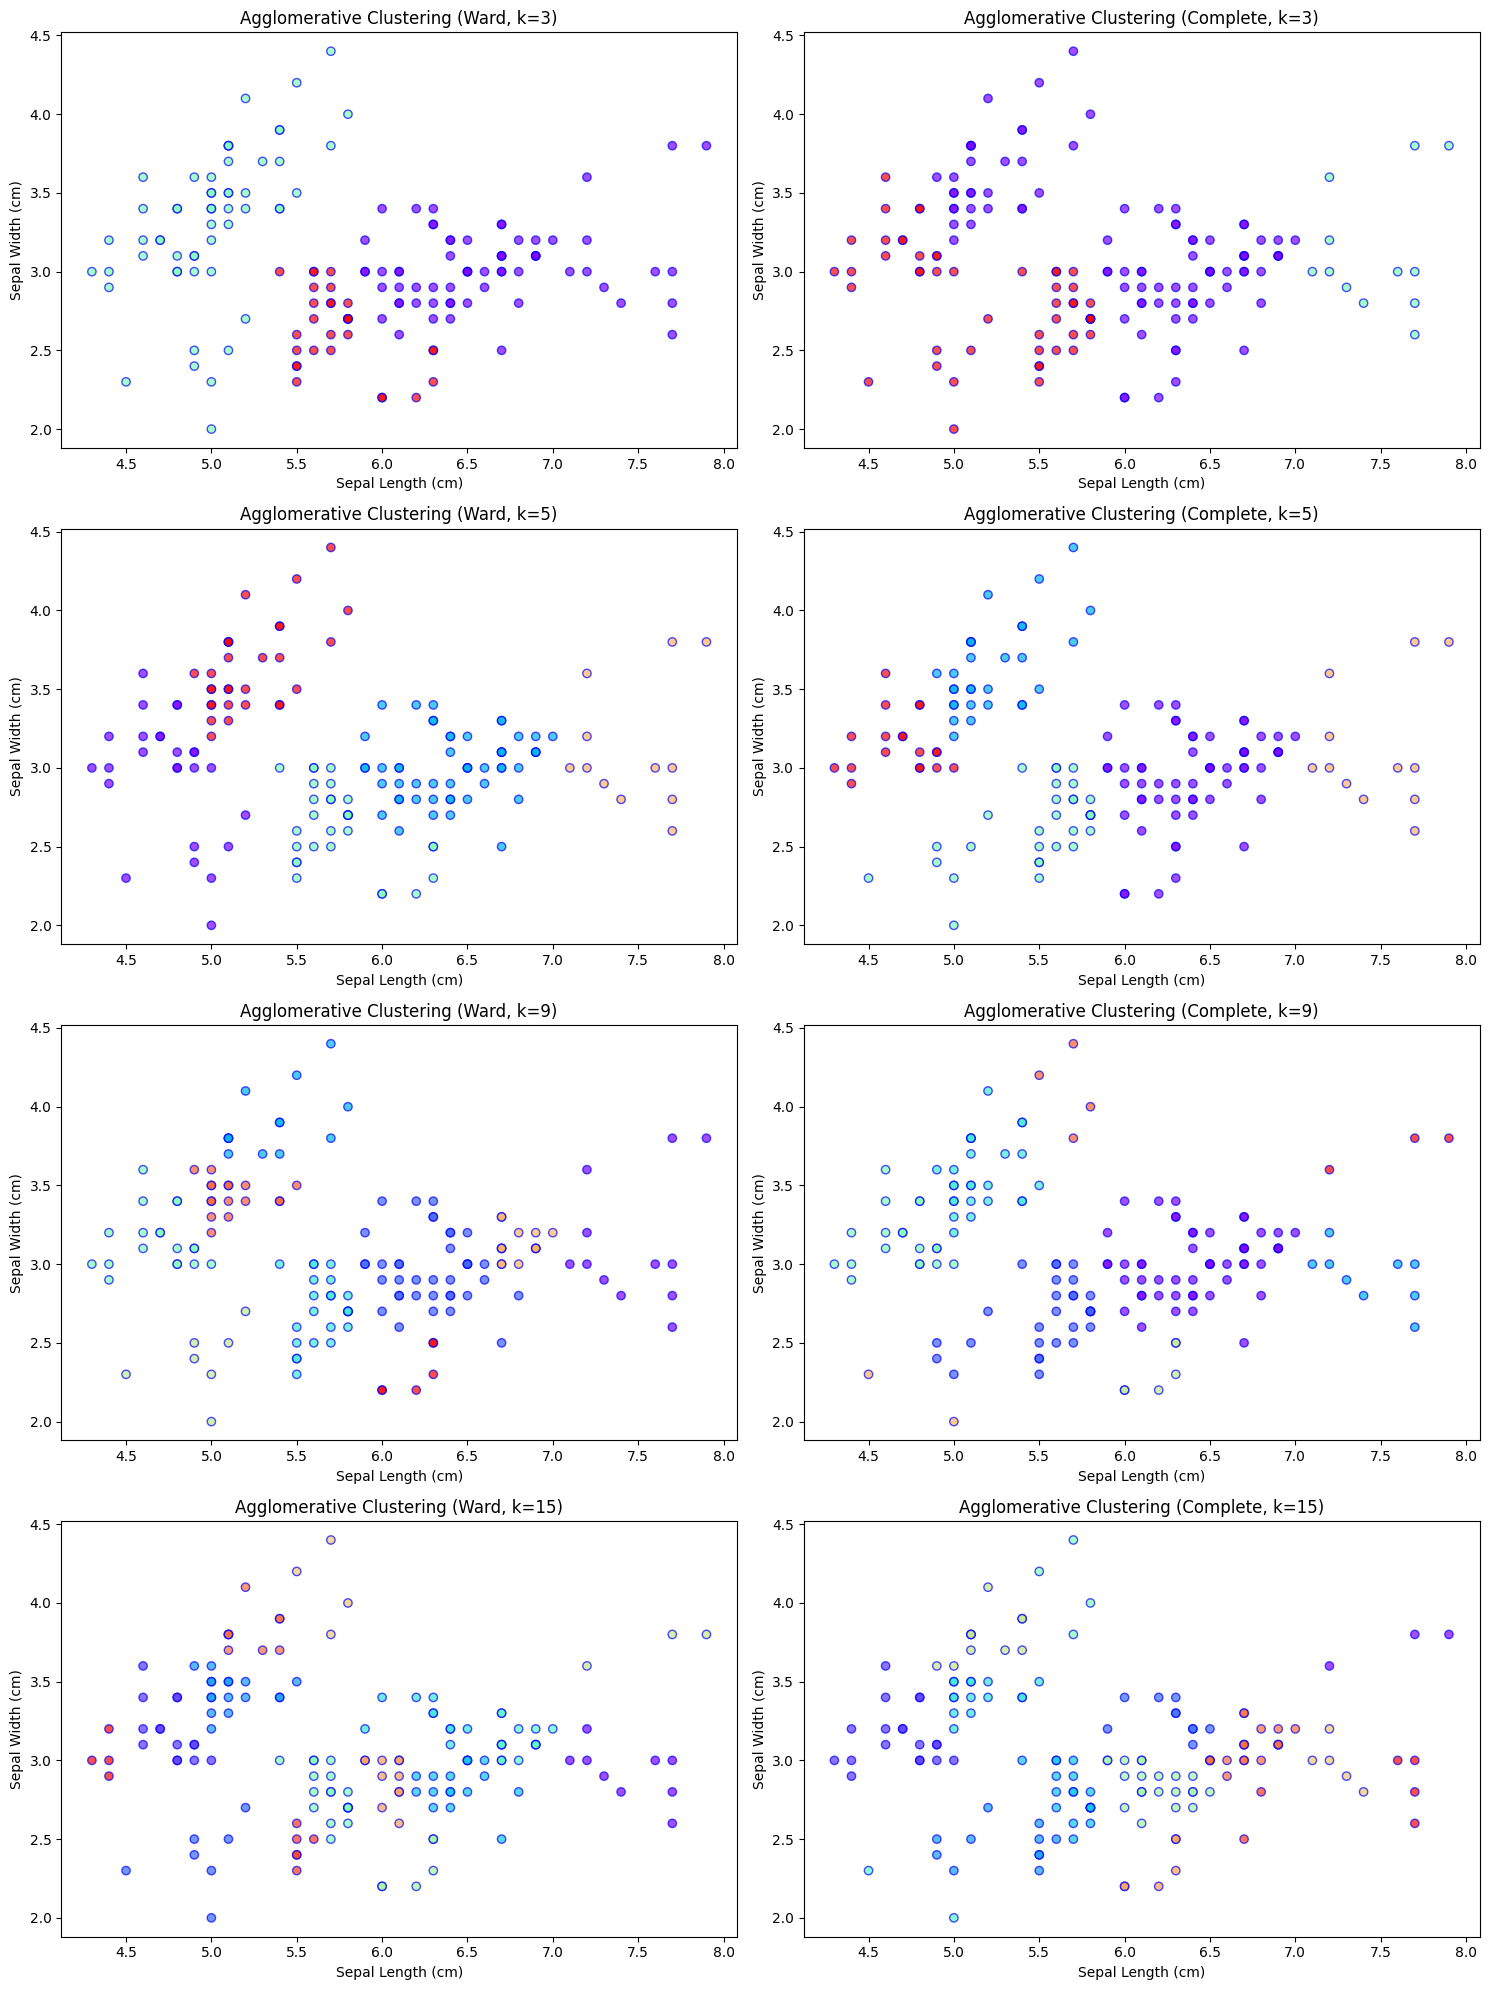

In [54]:
def plot_clusters(data, labels, title, ax):  
    scatter = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')  
    ax.set_xlabel('Sepal Length (cm)')  
    ax.set_ylabel('Sepal Width (cm)')  
    ax.set_title(title)  
    return scatter  

k_values = [3, 5, 9, 15]  

fig, axes = plt.subplots(len(k_values), 2, figsize=(15, 20))  
  
for i, k in enumerate(k_values):  
    # Ward linkage  
    ward = AgglomerativeClustering(n_clusters=k, linkage='ward')  
    ward_labels = ward.fit_predict(df)  
    plot_clusters(df, ward_labels, f'Agglomerative Clustering (Ward, k={k})', axes[i, 0])  
      
    # Complete linkage  
    complete = AgglomerativeClustering(n_clusters=k, linkage='complete')  
    complete_labels = complete.fit_predict(df)  
    plot_clusters(df, complete_labels, f'Agglomerative Clustering (Complete, k={k})', axes[i, 1])  
  
# Adjust layout  
plt.tight_layout()  
plt.show()  
 

## Step 5: Implement k-means clustering using the same number of clusters, and show the clusters in 2d scatter plot

Modified the plot_clusters function from before to show centers for k-mean

In [57]:
def plot_clusters_kmeans(data, labels, centers, title, ax):  
    scatter = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')  
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X')  # Plot cluster centers  
    ax.set_xlabel('Sepal Length (cm)')  
    ax.set_ylabel('Sepal Width (cm)')  
    ax.set_title(title)  
    return scatter  ## Step 5 

C:\Users\cchen\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cchen\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cchen\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cchen\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

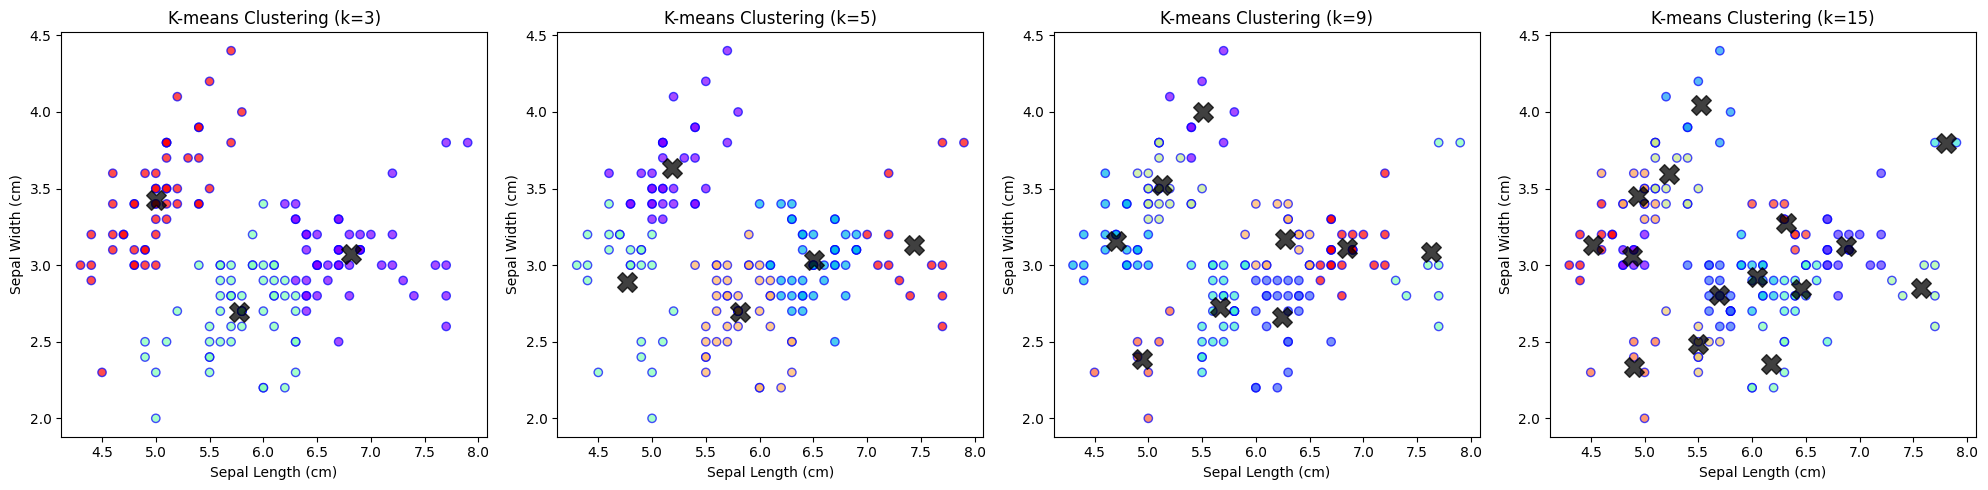

In [60]:
# Create subplots  
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5))  
  
for i, k in enumerate(k_values):  
    # K-means clustering  
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans_labels = kmeans.fit_predict(df)  
    centers = kmeans.cluster_centers_  
    plot_clusters_kmeans(df, kmeans_labels, centers, f'K-means Clustering (k={k})', axes[i])  
  
# Adjust layout  
plt.tight_layout()  
plt.show()  